<h4>Problem Statement</h4>
Clustering: K-Means  
Dataset: Cities_r2.csv 
Apply Data pre-processing (Label Encoding , Data Transformation....) techniques 
if necessary. 
Apply K-Means clustering algorithms (based on total_graduates) to find the group 
of customers

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA # Principal Component Analysis module used for dimensionality reduction


In [3]:
# Load the dataset
df = pd.read_csv('/Users/namanlabhsetwar/Desktop/Sem 5 Practical/ML- Lab Assignments/LP-1 Dataset/K-Means & Hirarchical Clustering/cities_r2.csv')
df.head(10) # Display first 10 rows of the dataset

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
5,Agartala,16,TRIPURA,1,399688,199616,200072,33635,17341,16294,343633,174524,169109,1002,940,93.88,95.75,92.02,"23.831457,91.2867777",52711,30215,22496
6,Agra,9,UTTAR PRADESH,15,1574542,849771,724771,186516,105279,81237,880530,503805,376725,853,772,63.44,67.67,58.54,"27.1766701,78.0080745",185813,106082,79731
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,4464303,2459823,2004480,897,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591
8,Ahmadnagar,27,MAHARASHTRA,26,350905,179755,171150,36712,19748,16964,287468,152819,134649,952,859,91.49,95.51,87.33,"19.0952075,74.7495916",51661,29832,21829
9,Aizawl,15,MIZORAM,3,291822,143803,148019,35147,17667,17480,253588,125256,128332,1029,989,98.80,99.30,98.31,"23.727107,92.7176389",26832,14900,11932


In [4]:
# Select relevant features for clustering (total_graduates in this case)
X = df[['total_graduates']]# values converts it into a numpy array
# X = df["total_graduates"].values.reshape(-1,1)


In [5]:
print(X)

     total_graduates
0              16287
1               8863
2              10565
3              19225
4              11902
..               ...
488            30656
489           109613
490            19363
491            29803
492            13511

[493 rows x 1 columns]


In [6]:
df.isnull().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [7]:

# Data pre-processing - Standardize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
print(X_scaled)

[[-2.80994447e-01]
 [-3.22787252e-01]
 [-3.13205981e-01]
 [-2.64455215e-01]
 [-3.05679448e-01]
 [-7.59484982e-02]
 [ 6.73338398e-01]
 [ 3.96117228e+00]
 [-8.18593879e-02]
 [-2.21632226e-01]
 [ 6.63519492e-02]
 [-3.17822105e-01]
 [-9.28142368e-02]
 [-1.13890781e-01]
 [-2.47353041e-01]
 [ 1.86551299e-01]
 [ 9.39699976e-01]
 [-4.18736264e-02]
 [-1.75972011e-01]
 [-2.56613434e-01]
 [-2.22960769e-01]
 [ 1.74419901e-01]
 [-2.55268003e-01]
 [-3.28698142e-01]
 [ 1.45203218e-01]
 [-3.09040211e-01]
 [ 4.17458797e-01]
 [-2.94550087e-01]
 [-2.04907223e-01]
 [-1.26675191e-01]
 [-3.01378572e-01]
 [-1.73658320e-01]
 [-3.25018432e-03]
 [-3.05172801e-01]
 [-2.98704599e-01]
 [ 5.24130653e-01]
 [-8.19381997e-02]
 [-2.60593434e-01]
 [-2.31297938e-01]
 [-3.51604247e-01]
 [-2.93362280e-01]
 [-2.45900651e-01]
 [-1.91672460e-01]
 [-2.57334000e-01]
 [-2.75719682e-01]
 [-2.42247158e-01]
 [-2.81968337e-01]
 [-1.69458773e-01]
 [-3.03134951e-01]
 [-2.39083424e-01]
 [-2.37490299e-01]
 [-2.65260222e-01]
 [-3.2445918

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

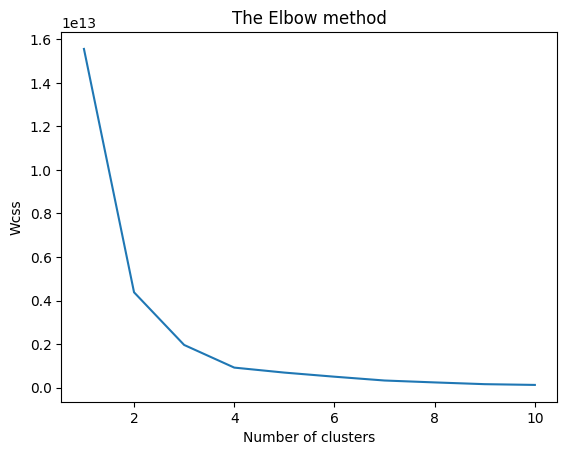

In [11]:
from sklearn.cluster import KMeans
wcss = [] # Within Cluster Sum of Squares
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42) # should be in same sequence
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  #THIS IS USED TO PLOT THE GRAPH
plt.plot(range(1,11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("Wcss")
plt.title("The Elbow method")
plt.show()

In [12]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42) # random_state is the seed used by the random number generator
df['cluster'] = kmeans.fit_predict(X_scaled) # fit_predict() returns cluster labels

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
# Display the resulting clusters
print(df[['name_of_city', 'total_graduates', 'cluster']])

      name_of_city  total_graduates  cluster
0          Abohar             16287        0
1        Achalpur              8863        0
2        Adilabad             10565        0
3       Adityapur             19225        0
4           Adoni             11902        0
..             ...              ...      ...
488  Vizianagaram             30656        0
489      Warangal            109613        0
490        Wardha             19363        0
491   Yamunanagar             29803        0
492      Yavatmal             13511        0

[493 rows x 3 columns]


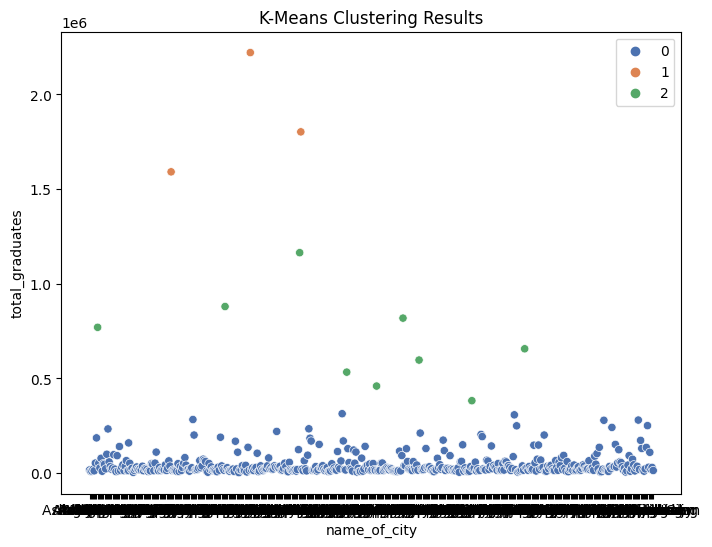

In [17]:
import seaborn as sns

# Scatter plot for K-Means clusters
plt.figure(figsize=(8, 6))

# If using PCA components for visualization
# plt.scatter(df['PCA1'], df['PCA2'], c=df['cluster'], cmap='viridis')
sns.scatterplot(x='name_of_city', y='total_graduates', hue='cluster', data=df, palette='deep')
plt.xlabel('name_of_city')
plt.ylabel('total_graduates')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()
#GIVE NAMES TO CLUSTERS IN FIGURE
